<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Derivative_pricing_american_options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def american_put(S0, K, r, T, N, u, d):
  """
  Prices an American put option using the binomial model.

  Args:
    S0: Initial stock price
    K: Strike price
    r: Risk-free interest rate
    T: Time to expiration
    N: Number of time steps
    u: Up factor
    d: Down factor

  Returns:
    The price of the American put option.
  """

  dt = T / N
  q = (np.exp(r * dt) - d) / (u - d)

  # Create stock price tree
  stock_prices = np.zeros((N + 1, N + 1))
  stock_prices[0, 0] = S0
  for i in range(1, N + 1):
    for j in range(i + 1):
      stock_prices[i, j] = S0 * (u ** (j)) * (d ** (i - j))

  # Calculate option values at expiration
  option_values = np.maximum(K - stock_prices[-1], 0)

  # Backward induction
  for i in range(N - 1, -1, -1):
    for j in range(i + 1):
      option_values[i, j] = np.maximum(
          K - stock_prices[i, j],
          np.exp(-r * dt) * (q * option_values[i + 1, j + 1] + (1 - q) * option_values[i + 1, j])
      )

  return option_values[0, 0]

# Example usage
S0 = 45
K = 100
r = 0
T = 5
N = 5
u = 1.2
d = 1 / u

put_price = american_put(S0, K, r, T, N, u, d)
print("American put price:", put_price)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [2]:
import numpy as np

def american_put(S0, K, r, T, N, u, d):
  """
  Prices an American put option using the binomial model.

  Args:
    S0: Initial stock price
    K: Strike price
    r: Risk-free interest rate
    T: Time to expiration
    N: Number of time steps
    u: Up factor
    d: Down factor

  Returns:
    The price of the American put option.
  """

  dt = T / N
  q = (np.exp(r * dt) - d) / (u - d)

  # Create stock price tree
  stock_prices = np.zeros((N + 1, N + 1))
  stock_prices[0, 0] = S0
  for i in range(1, N + 1):
    for j in range(i + 1):
      stock_prices[i, j] = S0 * (u ** (j)) * (d ** (i - j))

  # Calculate option values at expiration
  option_values = np.maximum(K - stock_prices[-1], 0)

  # Backward induction
  for i in range(N - 1, -1, -1):
    for j in range(i + 1):
      # Keep option_values as a 2D array during updates
      option_values[i, j] = np.maximum(
          K - stock_prices[i, j],
          np.exp(-r * dt) * (q * option_values[i + 1, j + 1] + (1 - q) * option_values[i + 1, j])
      )

  return option_values[0, 0]

# Example usage
S0 = 45
K = 100
r = 0
T = 5
N = 5
u = 1.2
d = 1 / u

put_price = american_put(S0, K, r, T, N, u, d)
print("American put price:", put_price)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [3]:
import numpy as np

def american_put(S0, K, r, T, N, u, d):
  """
  Prices an American put option using the binomial model.

  Args:
    S0: Initial stock price
    K: Strike price
    r: Risk-free interest rate
    T: Time to expiration
    N: Number of time steps
    u: Up factor
    d: Down factor

  Returns:
    The price of the American put option.
  """

  dt = T / N
  q = (np.exp(r * dt) - d) / (u - d)

  # Create stock price tree
  stock_prices = np.zeros((N + 1, N + 1))
  stock_prices[0, 0] = S0
  for i in range(1, N + 1):
    for j in range(i + 1):
      stock_prices[i, j] = S0 * (u ** (j)) * (d ** (i - j))

  # Calculate option values at expiration
  option_values = np.maximum(K - stock_prices[-1], 0)

  # Backward induction
  for i in range(N - 1, -1, -1):
    for j in range(i + 1):
      # Keep option_values as a 2D array during updates
      option_values[i, j] = np.maximum(
          K - stock_prices[i, j],
          np.exp(-r * dt) * (q * option_values[i + 1, j + 1] + (1 - q) * option_values[i + 1, j])
      )

  return option_values[0, 0]

# Example usage
S0 = 45
K = 100
r = 0
T = 5
N = 5
u = 1.2
d = 1 / u

put_price = american_put(S0, K, r, T, N, u, d)
print("American put price:", put_price)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [4]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

In [5]:
option_price, C, S = american_option(45, 100, 5, 0, 1.2, 0.833, 5, "P")

In [6]:
option_price

55.233617727991856

In [8]:
C

array([[55.23361773,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [62.515     , 46.51339944,  0.        ,  0.        ,  0.        ,
         0.        ],
       [68.774995  , 55.018     , 36.32824906,  0.        ,  0.        ,
         0.        ],
       [73.98957084, 62.529994  , 46.0216    , 24.71944555,  0.        ,
         0.        ],
       [78.33331251, 68.787485  , 55.0359928 , 35.22592   , 12.13684142,
         0.        ],
       [81.95164932, 73.99997501, 62.544982  , 46.04319136, 22.271104  ,
         0.        ]])

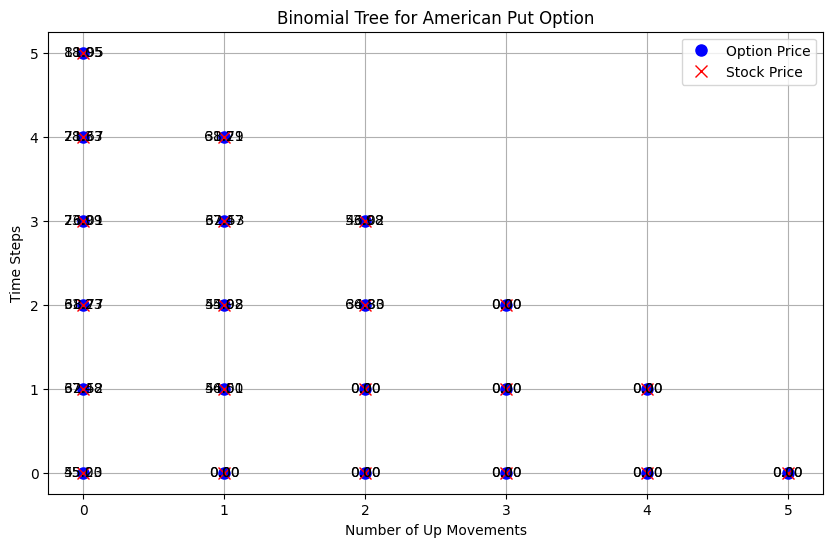

In [12]:
# prompt: PLOT option_price,C,S IN FORM OF BINOMIAL TREE

import matplotlib.pyplot as plt

def plot_binomial_tree(C, S):
  """
  Plots the binomial tree for option prices and underlying asset prices.

  Args:
    C: 2D array of option prices at each node.
    S: 2D array of underlying asset prices at each node.
  """

  num_steps = C.shape[0] - 1

  fig, ax = plt.subplots(figsize=(10, 6))

  # Plot option prices
  for i in range(num_steps + 1):
    for j in range(i + 1):
      ax.plot(j, num_steps - i, 'o', markersize=8, color='blue', label='Option Price' if i == 0 and j == 0 else None)
      ax.text(j, num_steps - i, f'{C[num_steps - i, j]:.2f}', ha='center', va='center', color='black')

  # Plot underlying asset prices
  for i in range(num_steps + 1):
    for j in range(i + 1):
      ax.plot(j, num_steps - i, 'x', markersize=8, color='red', label='Stock Price' if i == 0 and j == 0 else None)
      ax.text(j, num_steps - i, f'{S[num_steps - i, j]:.2f}', ha='center', va='center', color='black')

  ax.set_title('Binomial Tree for American Put Option')
  ax.set_xlabel('Number of Up Movements')
  ax.set_ylabel('Time Steps')
  ax.legend()
  plt.grid(True)
  plt.show()

# Plot the tree
plot_binomial_tree(C, S)


In [13]:
def call_option_delta(S_ini, K, T, r, u, d, N):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

In [14]:
price, call, S, delta = call_option_delta(100, 90, 15, 0, 1.2, 0.8, 15)
print("Underlying: \n", S)
print("Call Price: \n", call)
print("Delta: \n", delta)

Underlying: 
 [[ 100.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  80.          120.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  64.           96.          144.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  51.2          76.8         115.2         172.8           0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  40.96         61.44         92.16        138.24        207.36
     0.            0.            0.            0.            0.
     0.            0

In [34]:
import numpy as np

def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probabilities
    C = np.zeros([N + 1, N + 1])  # Option prices
    S = np.zeros([N + 1, N + 1])  # Underlying prices
    Delta = np.zeros([N, N])  # Delta

    # Initialize option values at maturity
    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))
        if opttype == "P":
            C[N, i] = max(K - S[N, i], 0)
        else:
            C[N, i] = max(S[N, i] - K, 0)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            if opttype == "P":
                C[j, i] = max(C[j, i], K - S[j, i])
            else:
                C[j, i] = max(C[j, i], S[j, i] - K)
            if j > 0:
                Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

    return C[0, 0], C, S, Delta

# Given parameters
S_ini = 36
K = 31
T = 5
r = 0
u = 1.5
d = 1/u
N = 5
opttype = "C"

# Compute the option price and delta
option_price, C, S, Delta = american_option(S_ini, K, T, r, u, d, N, opttype)

print("Option Price at t=0: ", "{:.2f}".format(option_price))
print("Underlying Price Evolution:\n", S)
print("Option Payoff:\n", C)
print("Delta Values:\n", Delta)


Option Price at t=0:  14.73
Underlying Price Evolution:
 [[ 36.           0.           0.           0.           0.
    0.        ]
 [ 24.          54.           0.           0.           0.
    0.        ]
 [ 16.          36.          81.           0.           0.
    0.        ]
 [ 10.66666667  24.          54.         121.5          0.
    0.        ]
 [  7.11111111  16.          36.          81.         182.25
    0.        ]
 [  4.74074074  10.66666667  24.          54.         121.5
  273.375     ]]
Option Payoff:
 [[ 14.73152   0.        0.        0.        0.        0.     ]
 [  5.8496   28.0544    0.        0.        0.        0.     ]
 [  1.472    12.416    51.512     0.        0.        0.     ]
 [  0.        3.68     25.52     90.5       0.        0.     ]
 [  0.        0.        9.2      50.      151.25      0.     ]
 [  0.        0.        0.       23.       90.5     242.375  ]]
Delta Values:
 [[0.         0.         0.         0.         0.        ]
 [0.5472     0.8688  

In [22]:

# The specific Delta^u_1
Delta_u_1 = Delta[0, 1]
print("Delta^u_1: ", Delta_u_1)


Delta^u_1:  0.0


In [19]:
def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros([M])  # Asian prices
    S = np.zeros([M, N + 1])  # underlying price
    S[:, 0] = S_ini

    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]

        Asian[j] = np.exp(-r * T) * max(Total / (N + 1) - K, 0)

    return S, Asian

In [20]:
S, Asian = asian_option_mc(100, 90, 1, 0, 0.3, 2500, 10000)